In [12]:
from decimal import Decimal
import math

from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import scipy as sci

# Problem1

Download individual files for the 7 bands of a Landsat image of San Diego, acquired in August 1990 (*.raw files). DONE

The spectral range and other file characteristics are provided in the NLAPS header file (See Appendix A of image processing notes.) Here is a summary of the spectral bands.

|band #|min (μm)   |center (μm)| color       | 
|------|-----------|-----------|-------------|
|  1   |  0.45     |   0.485   |  Blue-Green | 
|  2   |  0.52     |    0.56   |  Green      | 
|  3   |  0.63     |    0.66   |  Red        | 
|  4   |  0.76     |    0.83   |  Near-IR    | 
|  5   |  1.55     |    1.65   |  Mid-IR     | 
|  6   |  10.40    |    11.45  |  Thermal-IR | 
|  7   |  2.08     |    2.255  |  Mid-IR     | 

#### <center>Table 2.1: Landsat Spectral Bands

# Problem 2
Display the thermal infrared band three ways: 

a) no contrast enhancement;
    original image

b) linear stretch; 
    linear strech is a special case of contrast modifiction in which transfer function mapping the original pixel range to new range is a constant gradient (i.e. scalar/number)
    effect: expand the range of pixel values
    
c) histogram equalization. 

Display results as grayscale. 

What do you see in the ocean areas? 

Compare the original image histogram with the equalized image histogram (use imhist() to display histograms).

In [13]:
import os
os.listdir("./landsat_data") # show contents of the directory

['all_bands.zip',
 'band1c.raw',
 'band2c.raw',
 'band3c.raw',
 'band4c.raw',
 'band5c.raw',
 'band6c.raw',
 'band7c.raw',
 'lab5start.m',
 'Rees_ch11_notes.rtf']

In [14]:
# band 6 is the thermal infrared
# read the band6c.raw binary file
# dtype is unsigned integeter 
fbin_ir = np.fromfile('./landsat_data/band6c.raw', dtype='uint8')

"""
Adopted from the matlab version given in lab5start.m
# ir = fread( fopen( 'band6c.raw', 'r'), [1500 1500], '*uint8')';
"""
# reshape using given dimensions
# 'ir' is the data for band 6 (using same variable name as the Professor Sandwell's 
# matlab example)
ir = np.array(np.reshape(fbin_ir, (1500, 1500)))

## 2b) Linear Stretch

Find minimum and maximum pixel in the given data (*data6*) and map the orignal range to use
a full pixel spectrum. This will increase used pixel range and image contrast.

original pixel range: $[min_{orig}, min_{orig}]$ <br />
new (full) pixel range: $[min_{new}, max_{new}]$, usually [0, 255]


### Eqn 2b. Linear Stretch Equation 
\begin{equation*}
pixel_{out} = (pixel_{in} - min_{orig}) \frac{max_{new} - min_{new}}{max_{orig} - min_{orig}} + min_{new}
\end{equation*}

Reference: http://homepages.inf.ed.ac.uk/rbf/HIPR2/stretch.htm


In [15]:
def transform_linear_stretch(data):
    """
    data [String] data is original numpy array of pixels
    
    Return: output is modified, linearly streched data according to Eqn 2b.
    """
    min_orig = np.amin(data) # Minimum of the flattened array (original)
    max_orig = np.amax(data) # Maximum of the flattened array (original)
    min_new = 0
    max_new = 255
    
    # define linear stretch transformation function
    linear_stretcher = lambda pixel_orig: ((pixel_orig - min_orig)*(
        (max_new - min_new) / (max_orig - min_orig))) + min_new
    
    # Reference: http://stackoverflow.com/questions/35215161/most-efficient-way-to-map-function-over-numpy-array
    v_linear_stretcher = np.vectorize(linear_stretcher) # vectorizing
    return v_linear_stretcher(data)

In [16]:
# linearly stretched version
ir_lin_stretch = transform_linear_stretch(ir)

In [17]:
#checking ir and ir_lin_stretch have different values
#np.savetxt('test.out', ir)
#np.savetxt('test-ls.out', ir_lin_stretch)

In [18]:
print np.amax(ir)
print np.amin(ir)

195
104


In [19]:
((195-104)*(255) / (195-104)) + 0


255

In [20]:
ir_lin_stretch
print np.amin(ir_lin_stretch) # Minimum of the flattened array (original)
print np.amax(ir_lin_stretch)

0
182


In [21]:
def plot_band_graysc(_plt, subplot_num, _data, title):
    """ Plot the given band (data) in grayscale
    
    subplot_num (int): desginate the subplot location
    data (numpy array)
    title (string): plot title
    """
    _plt.subplot(subplot_num)
    _plt.imshow(_data, cmap=plt.cm.gray)
    _plt.title(title, fontsize=16) 

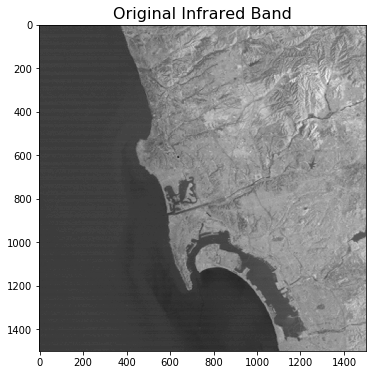

In [22]:
plt.figure(figsize=(16,6))

plt.imshow(ir, cmap = plt.cm.gray)
plt.title('Original Infrared Band', fontsize=16)

plt.show()

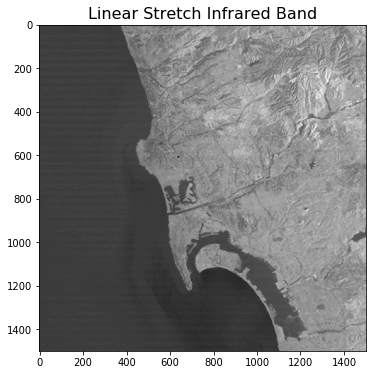

In [23]:
plt.figure(figsize=(16,6))
plt.imshow(ir_lin_stretch, cmap =plt.cm.gray)
plt.title('Linear Stretch Infrared Band', fontsize=16)
plt.show()

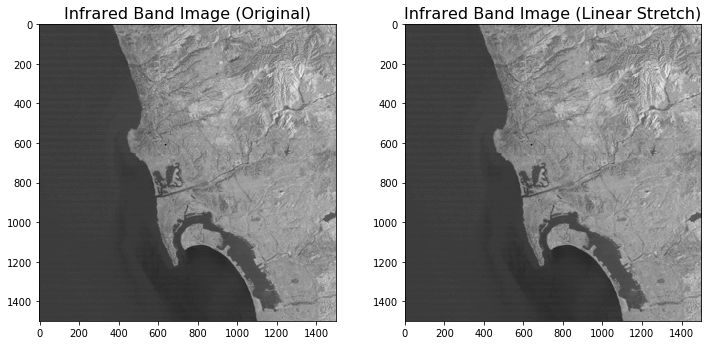

In [24]:
# b) linear stretch
plt.figure(figsize=(12,12))

# a) no contrast enhancement
plot_band_graysc(plt, 221, ir, 'Infrared Band Image (Original)')

# b) linear stretch
plot_band_graysc(plt, 222, 4*ir_lin_stretch, 'Infrared Band Image (Linear Stretch)')


# c) historgram equalization
#plot_band_graysc(plt, 223, ir, 'Infrared Band Image (Histogram Equalization)')
# plt.savefig('band6_strech_equalization.png', dpi=300)

plt.show()
